*픽셀값의 변화율이 큰 지점 ➔ Edge*

+ *이산함수이기에, 편미분 + 미분 근사화 사용*

*Sobel 커널로 엣지 검출, 캐니 엣지 검출 (2가지 사용)*

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

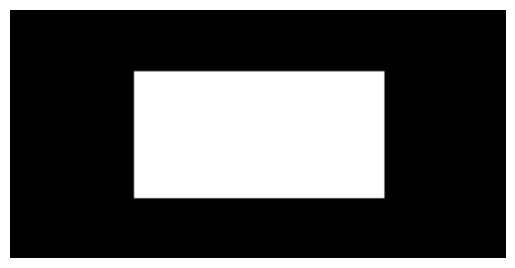

In [16]:
image = np.zeros((100, 200), dtype=np.uint8)
cv2.rectangle(image, (50, 25), (150, 75), 255, -1)

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

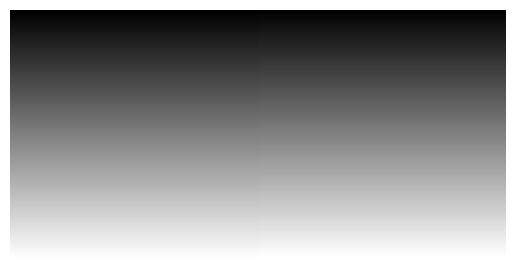

In [17]:
gradient_image = np.linspace(0, 255, 200, dtype=np.uint8).repeat(100).reshape(100, 200)

plt.imshow(gradient_image, cmap="gray")
plt.axis("off")
plt.show()

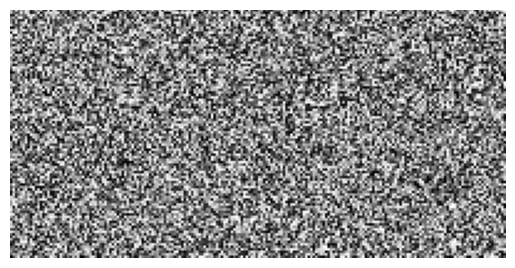

In [18]:
noise_image = np.random.randint(0, 256, (100, 200), dtype=np.uint8)

plt.imshow(noise_image, cmap="gray")
plt.axis("off")
plt.show()

### 1. Edge Detection

*커널 이용, 이산 미분 계산*

+ *단순 차분보다 강건성이 높음*  
+ *Sobel 커널 사용, 중앙차분 방식*  

  + $\frac{\partial f}{\partial x} \approx f(x+1, y)-f(x-1, y)$

---

*아래 Sobel 커널 (-1, 0, 1)을 보면, 현재 픽셀을 기준으로 양옆의 밝기 차이를 계산하는 중앙차분 방식*

$$
G_x=\left[\begin{array}{lll}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{array}\right]
$$

$$
G_y=\left[\begin{array}{lll}
-1 & -2 & -1 \\
 0 & 0 & 0 \\
1 & 2 & 1
\end{array}\right]
$$

In [27]:
def visualize_gradient(image) -> None:

    # x, y 방향 Gradient 계산 (Sobel Kenel 사용)
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Gradient Magnitude 계산
    grad_magnitude = cv2.magnitude(grad_x, grad_y)

    # 스케일링 (0~255)
    grad_magnitude = cv2.normalize(grad_magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Canny Edge Detection
    low_threshold = 50
    high_threshold = 150

    edges = cv2.Canny(image, low_threshold, high_threshold)

    # 출력
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Gradient Magnitude")
    plt.imshow(grad_magnitude, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Edge Detection (Canny)")
    plt.imshow(edges, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

*(1) Sobel 필터로 $G_x$, $G_y$ 계산*

+ *각 픽셀에서 x와 y 방향의 밝기 변화량*

*(2) Gradient Magnitude 계산*

+ $G=\sqrt{G_x^2+G_y^2}$  
+ *엣지 강도 계산*  

---

*(1) Canny 엣지 검출*

+ *임계값 사용, 엣지 여부 결정*  

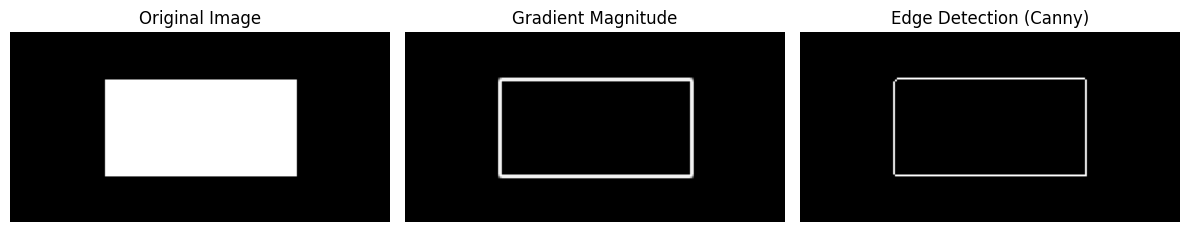

In [28]:
visualize_gradient(image)

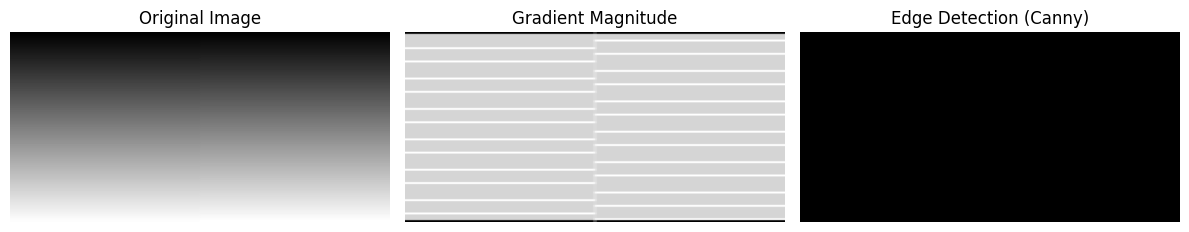

In [25]:
visualize_gradient(gradient_image)

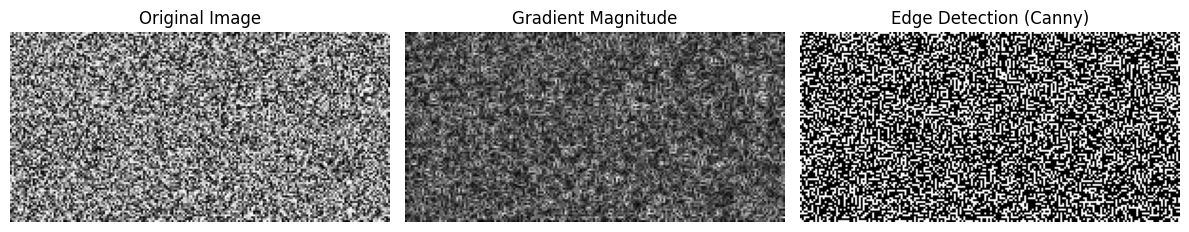

In [26]:
visualize_gradient(noise_image)

In [ ]:
# 고전적인 엣지 검출 방식 (Sobel, Canny 사용)